In [1]:
# Dependencies
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.stats as sts

In [2]:
csv_path = "Resources/videos.csv"
df = pd.read_csv(csv_path)
# df.head(10)

In [3]:
# clean up data before creating dataframe for calculations
df_path = "Resources/videos.csv"
df = pd.read_csv(df_path)

df[["publish date", "asdf"]] = df["publish_time"].str.split(pat="T", n=1, expand=True)


df[["publish time", "trash"]] = df["asdf"].str.split(pat=".", n=1, expand=True)


df["publish date"] = pd.to_datetime(df["publish date"])
df["publish_date"] = df["publish date"].dt.strftime('%m/%d/%Y')


category_json_path = "Resources/US_category_id.json"
category_dict = {'category_id': [], 'Category': []}
indexer = 0

with open(category_json_path) as json_data:
  data = json.load(json_data)

items = data['items']
# items

for item in items:
    
    category_dict['category_id'].append(data['items'][indexer]['id'])
    category_dict['Category'].append(data['items'][indexer]['snippet']['title'])
    indexer = indexer + 1
        


category_df = pd.DataFrame(category_dict)
category_df["category_id"] = category_df["category_id"].astype(int)
df = df.merge(category_df, how='inner', on='category_id')



df["trending_date"]=pd.to_datetime(df["trending_date"].astype(str), format="%y.%d.%m")
df["trending_date"] = df["trending_date"].dt.strftime("%m/%d/%Y")
# df.head()

In [4]:
# clean up data frame for only columns we want to work with
df = df[["video_id", "title", "channel_title", "Category", "publish time", "publish_date", "trending_date", "views", "likes", "dislikes", "tags", "comments_disabled"]]
# df.head()

In [5]:
# data frame with rows for last trending date
last_df = df[['video_id', 'trending_date']]
last_df = last_df.groupby('video_id').max()
last_df = last_df.reset_index()
last_df = last_df.merge(df, how ='left')
last_df.head()

,video_id,trending_date,title,channel_title,Category,publish time,publish_date,views,likes,dislikes,tags,comments_disabled
0,-0CMnp02rNY,06/11/2018,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,Entertainment,13:00:00,06/04/2018,800359,9773,332,"ellen|""ellen degeneres""|""the ellen show""|""elle...",False
1,-0NYY8cqdiQ,02/01/2018,Megan Mullally Didn't Notice the Interesting P...,TheEllenShow,Entertainment,14:00:39,01/29/2018,563746,4429,54,"megan mullally|""megan""|""mullally""|""will and gr...",False
2,-1Hm41N0dUs,05/01/2018,Cast of Avengers: Infinity War Draws Their Cha...,Jimmy Kimmel Live,Comedy,07:30:02,04/27/2018,2058516,41248,580,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",False
3,-1yT-K3c6YI,12/02/2017,YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...,Molly Burke,People & Blogs,18:30:43,11/28/2017,231341,7734,212,"youtube quiz|""youtuber quiz""|""truth or dare""|""...",False
4,-2RVw2_QyxQ,11/16/2017,2017 Champions Showdown: Day 3,Saint Louis Chess Club,Education,02:39:01,11/12/2017,71089,460,27,"Chess|""Saint Louis""|""Club""",False


In [6]:
# data frame with rows for first trending date
first_df = df[['video_id', 'trending_date']]
first_df = first_df.groupby('video_id').min()
first_df = first_df.reset_index()
first_df = first_df.merge(df, how ='left')
# first_df.head()

In [7]:
# Mike's Code

# VISUALIZATION 5: popular tags on YouTube videos

# need to split the tags for each video into a new DataFrame in order to graph the bar chart
# empty lists to store video_id & tags within for loops below
tags_ = []
ids = []

# put tags into new list, split on "|"
for _, row in first_df.iterrows():
    current_tags = row["tags"].split("|")
    
    # for every video, all tags except the first one have quotation marks
    # remove quotes by slicing the first and last character of each entry, starting with the 2nd one (index=1)
    for i in range(1, len(current_tags)):
        current_tags[i] = current_tags[i][1:-1]
    
    # push the clean entries into each list
    for tag in current_tags:
        tags_.append(tag)
        ids.append(row["video_id"])

# create new dataframe with the clean entries, using video_id as the index
video_tags = pd.DataFrame({"video_id": ids, "tags": tags_})
# video_tags

In [8]:
video_tags["tags"].nunique()

56163

In [9]:
## Mike's Code

In [10]:
# Riley's Code

In [11]:
# Split the Publish time column by the hour, convert to integer

publish_df = last_df
publish_df[["publish_hour", "publish_min_sec"]] = publish_df["publish time"].str.split(":", n=1, expand=True)
publish_df['publish_hour'] = publish_df['publish_hour'].astype(int)
# publish_df.head()

# New DF grouped by the publish hour

publish_group_df = publish_df.groupby('publish_hour').count()
publish_group_df = publish_group_df['video_id']
# publish_group_df

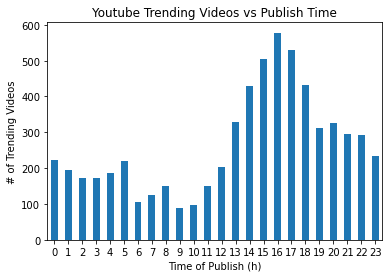

4215 days 00:00:00
0 days 00:00:00
22 days 14:47:56.611764
2 days 00:00:00


TypeError: boxplot() missing 1 required positional argument: 'x'

In [12]:
# Plot # of trending videos by publish time

publish_group_df.plot(kind='bar', rot = 0)

plt.xlabel('Time of Publish (h)')
plt.ylabel('# of Trending Videos')
plt.title('Youtube Trending Videos vs Publish Time')
plt.show()

trend_df = first_df
trend_df['trending_date'] = pd.to_datetime(trend_df['trending_date'])
trend_df['publish_date'] = pd.to_datetime(trend_df['publish_date'])
trend_df['Days to Trend'] = trend_df['trending_date'] - trend_df['publish_date']
max_trend = trend_df['Days to Trend'].max()
min_trend = trend_df['Days to Trend'].min()
mean_trend = trend_df['Days to Trend'].mean()
med_trend = trend_df['Days to Trend'].median()

print(max_trend)
print(min_trend)
print(mean_trend)
print(med_trend)

plt.boxplot()
# I should add a box plot of days to go trending.

In [ ]:
## Riley's Code

In [ ]:
# Jackie's Code

## How many videos have gone trending per Category? (Bar Chart)
last_df['Category'].value_counts().sort_values().plot(kind='barh', figsize=(20,18))
plt.title("Number of trending videos by category", size=20)
plt.show()

## Statistical Summary
last_df.describe()

In [ ]:
## Convert to floats and store views and likes as x and y values
x_values = last_df['views'].astype('float')
y_values = last_df['dislikes'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Number of Views')
plt.ylabel('Number of Dislikes')
plt.title("Number of Dislikes by View", size=15)

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.6965206852640963


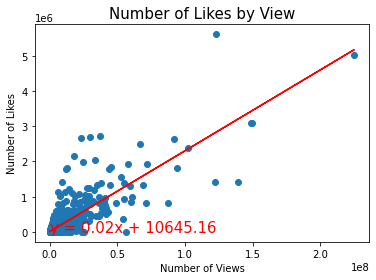

publish_hour       views               -0.045143
views              publish_hour        -0.045143
comments_disabled  likes               -0.023821
likes              comments_disabled   -0.023821
publish_hour       likes               -0.021527
likes              publish_hour        -0.021527
comments_disabled  publish_hour        -0.009944
publish_hour       comments_disabled   -0.009944
comments_disabled  dislikes            -0.003202
dislikes           comments_disabled   -0.003202
publish_hour       dislikes             0.001496
dislikes           publish_hour         0.001496
views              comments_disabled    0.003062
comments_disabled  views                0.003062
likes              dislikes             0.420363
dislikes           likes                0.420363
                   views                0.441550
views              dislikes             0.441550
                   likes                0.834578
likes              views                0.834578
views              v

In [13]:
## Convert to floats and store views and likes as x and y values
x_values = last_df['views'].astype('float')
y_values = last_df['likes'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Number of Views')
plt.ylabel('Number of Likes')
plt.title("Number of Likes by View", size=15)

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

# Generate the correlation matrix and find the strongest positive and negative correlations
videos_corr = last_df.corr()
videos_corr.unstack().sort_values()



In [14]:
## Jackie's Code

In [15]:
# Brian's Code

In [67]:
# Generate a bar plot showing the top 20 youtube channels with most trending videos.

# groupby video_id using count and channel_title
vids_per_title_df = last_df[["video_id", "channel_title"]]
# vids_per_title_df.head()

In [71]:
vids_per_title_df = vids_per_title_df.groupby("channel_title").count()
# len(vids_per_title_df)
vids_per_title_df.head()

,video_id
channel_title,
12 News,1
1MILLION Dance Studio,4
1theK (원더케이),5
20th Century Fox,18
2CELLOS,1


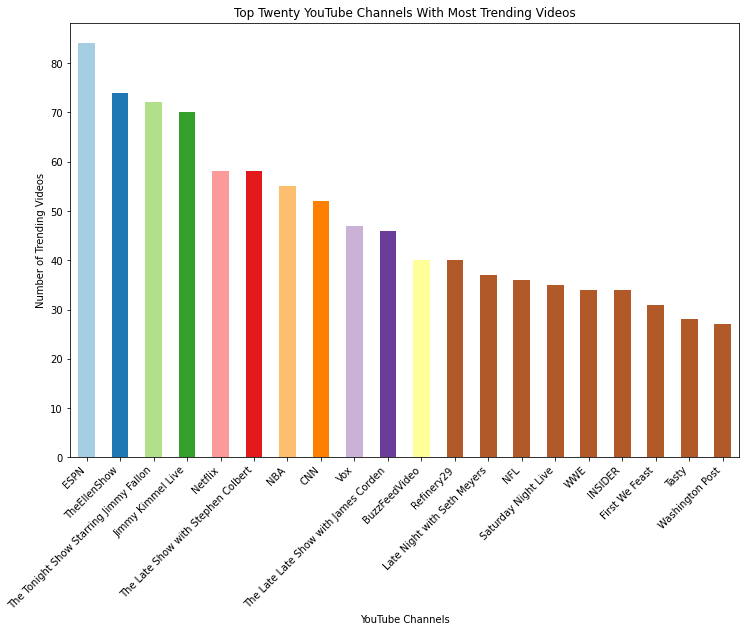

<Figure size 432x288 with 0 Axes>

In [72]:
vids_per_title_df = vids_per_title_df.sort_values(by = 'video_id', ascending = False)
# vids_per_title_df.head()

# plot a bar chart
# vids_per_title_df.head(20).plot(kind="bar", figsize=(12,8), color = "b", legend=False)
vids_per_title_df.head(20).plot(kind="bar", figsize=(12,8), color = [plt.cm.Paired(np.arange(len(vids_per_title_df)))], legend=False)

# title
plt.title("Top Twenty YouTube Channels With Most Trending Videos")
plt.xticks(rotation=45, horizontalalignment="right")
plt.xlabel("YouTube Channels")
plt.ylabel("Number of Trending Videos")

plt.show()
plt.tight_layout()

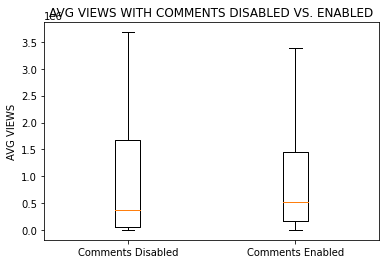

In [66]:
#Create 2 boxplots comparing the results of average Youtube video views with comments disabled and comments enabled.

comments_off_df = last_df.loc[last_df["comments_disabled"] == True, ["views", "comments_disabled"]]
# comments_off_df

comments_on_df = last_df.loc[last_df["comments_disabled"] == False, ["views", "comments_disabled"]]
# comments_on_df

fig1, ax1 = plt.subplots()
ax1.boxplot([comments_off_df['views'], comments_on_df['views']], showfliers = False)

# title and labels
plt.title('AVG VIEWS WITH COMMENTS DISABLED VS. ENABLED')
plt.ylabel('AVG VIEWS')
plt.xticks([1, 2], ["Comments Disabled","Comments Enabled"])

plt.show()

In [ ]:
## Brian's code